# MAPA

**Encuentra mediante una construcción geométrica la posición aproximada en un mapa desde la que se ha tomado una imagen en la que se ven algunos puntos característicos.**

## Dos puntos característicos

Se va a tomar como referencia la siguiente fotografía:

<img src="img/fotografia.jpg" width="40%"></img>

Se conocen los puntos característicos del `Santuario de Nuestra Señora de la Fuensanta, 30157 Murcia` y `Casa del Cabildo (o Casa del Sacristán), 30157 Murcia`.

En primer lugar, se va a calcular la distancia en píxeles de los edificios, con la ayuda de *Medidor.py*, modificado para indicar el ángulo y la distancia en píxeles entre dos puntos:

<img src="img/calculo-pixeles-distancia.png" width="40%"></img>

Como se puede observar, la distancia entre ambos edificios es 129.1 píxeles, y los rayos ópticos que pasan por ambos forman un ángulo de 10 grados.

In [89]:
ANGULO = 10
PIXELES_ENTRE_EDIFICIOS = 129.1

En segundo lugar, se va a buscar la distancia en metros entre estos dos edificios:

<img src="img/metros_distancia.png" width="25%"></img>

Como se puede observar, andando están a 160 metros, por lo que se puede aproximar que están a unos 100 metros en línea recta.

In [90]:
METROS_ENTRE_EDIFICIOS = 100

Posteriormente, se tiene el siguiente dibujo:

<img src="img/rectangulo-medidas.png" width="40%"></img>

Como se puede observar:
- d es la mitad de la distancia entre la casa y el monasterio: 85 metros / 2
- $\alpha$ es la mitad del ángulo que forman los rayos ópticos que pasan por ambos puntos: 10 grados / 2
- p es la distancia entre la mitad entre la casa y el monasterio, y el punto desde el que se tomó la fotografía: Lo que se quiere calcular

Por razones trigonométricas: $$\tan{(\alpha)} =\frac{d}{p} \rightarrow p = \frac{d}{\tan{(\alpha)}}$$

Se calcula el valor de p:

In [91]:
import numpy as np
alpha_grados = ANGULO/2 #grados
alpha_radianes = np.radians(alpha_grados) #radianes

d = METROS_ENTRE_EDIFICIOS/2 #metros

tan_alpha = np.tan(alpha_radianes)

p = d / tan_alpha #metros
p

571.5026151380671

Una vez obtenido todo lo anterior, se puede observar desde donde se tomó la fotografía dado un mapa (captura de Google Maps):

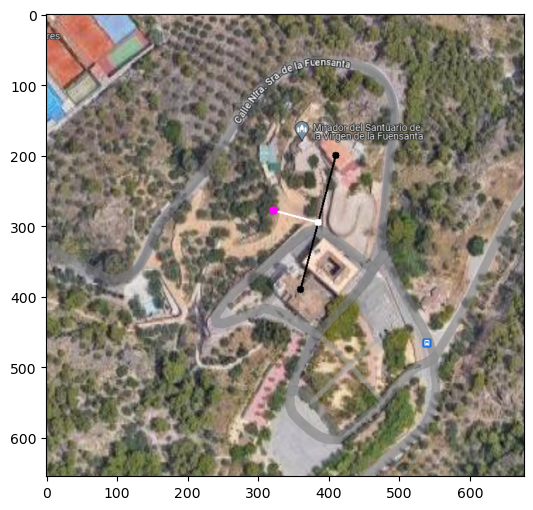

In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Imagen del mapa
mapa = cv2.imread('./img/mapa.png')

# Puntos característicos
p1 = (360, 390)
p2 = (410, 200)

# Distancia entre los puntos característicos en metros (2*d)
_2_d = 85

# Dibujar línea entre puntos característicos (2*d)
cv2.line(mapa, p1, p2, (0,0,0), 2)

# Dibujar los puntos característicos
cv2.circle(mapa, p1, 5, (0,0,0), -1)
cv2.circle(mapa, p2, 5, (0,0,0), -1)

# Dibujar línea p
## Calcular el punto medio
punto_medio = (int((p1[0] + p2[0])/2), int((p1[1]+p2[1])/2))
cv2.circle(mapa, punto_medio, 5, (255,255,255), -1)
## Calcular vector entre p1 y p2
vector_p1_p2 = np.array(p1) - np.array(p2)
## Calcular el vector de dirección p
p_vector = np.array([-vector_p1_p2[1], vector_p1_p2[0]])
## Normalizar el vector de dirección p
p_vector = p_vector / np.linalg.norm(p_vector)
## Calcular la distancia de p en píxeles
dist_p_pix = d * PIXELES_ENTRE_EDIFICIOS / METROS_ENTRE_EDIFICIOS
## Vector de dirección p con distancias correctas
p_vector = p_vector * dist_p_pix
## Punto final del vector (desde el que se tomó la fotografía)
punto_fotografia = (int(punto_medio[0] + p_vector[0]), int(punto_medio[1] + p_vector[1]))
## Dibujar la linea p
cv2.line(mapa, punto_medio, punto_fotografia, (255, 255, 255), 2)
cv2.circle(mapa, punto_fotografia, 6, (255, 0, 255), -1)

# Mostrar imagen con las líneas dibujadas
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(mapa, cv2.COLOR_BGR2RGB))
plt.show()

El punto desde el que se tomó la fotografía fue el punto rosa. 

Debe tenerse en cuenta que la fotografía no fue tomada por mí, por lo que desconozco el ancho y alto de la imagen original tomada por la cámara, y la distancia focal de esta. Se han tomado las medidas de la cámara de mi portatil (Acer Aspire 3) porque no se tenía ninguna fotografía con lugares característicos. Es por ello que el punto real desde el que se tomó la fotografía podría variar del resultado obtenido.

### Bibliografía:

[Dibujar una línea](https://www.geeksforgeeks.org/python-opencv-cv2-line-method/)

[Dibujar un círculo](https://www.geeksforgeeks.org/python-opencv-cv2-circle-method/)

[Apuntes de la asignatura](https://github.com/albertoruiz/umucv)

[Grados a radianes](https://runebook.dev/es/docs/numpy/reference/generated/numpy.radians)